In [118]:
import numpy as np
from qiskit import*
import math as m
from scipy import linalg as la
import matplotlib.pyplot as plt
import pylatexenc
from qiskit.quantum_info import*
from qiskit.visualization import*
from itertools import chain
%matplotlib inline

#we need this block to run the circuit
sim = Aer.get_backend('aer_simulator')

In [631]:
x1 = 1/np.sqrt(2)
x2 = 1j *1/np.sqrt(2);
print(x1, x2)
# x1 = 1/2
# x2 = 1j *1/2;
# print(x1, x2)

0.7071067811865475 0.7071067811865475j


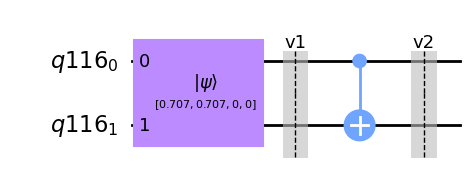

In [660]:
#Drawing the quantum circuit
# qr_1 = QuantumRegister(4)
# qc_test = QuantumCircuit(qr_1)
# initial_state=[0,x1,x1,0,0,0,0,0,0,x2,x2,0,0,0,0,0]
# qc_test.initialize(initial_state,[0,1,2,3])
# v1 = qc_test.save_statevector(label='v1')
# # qc_test.h(1)

# qc_test.cx(1,2)
# qc_test.cx(2,3)


#Drawing the quantum circuit
# qr_1 = QuantumRegister(3)
# qc_test = QuantumCircuit(qr_1)
# initial_state=[x1,x1,0,0,0,0,0,0]
# qc_test.initialize(initial_state,[0,1,2])
# v1 = qc_test.save_statevector(label='v1')


# qc_test.cx(0,1)
# qc_test.cx(1,2)

# #Drawing the quantum circuit
qr_1 = QuantumRegister(2)
qc_test = QuantumCircuit(qr_1)
initial_state=[x1,x1,0,0]
qc_test.initialize(initial_state,[0,1])
v1 = qc_test.save_statevector(label='v1')


qc_test.cx(0,1)
# qc_test.cx(1,2)



v2 = qc_test.save_statevector(label='v2')
# result = sim.run(qc_testj).result()
result = execute(qc_test, backend = sim).result()
qc_test.draw(output='mpl')

In [661]:
# Display the output state vector
psi_test_in = result.data(0)['v1']
psi_test_out = result.data(0)['v2']


display(psi_test_in.draw('latex'),
        psi_test_out.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [662]:
#Define Density Matrix for qc_test
rho_in = DensityMatrix(psi_test_in)
rho_out = DensityMatrix(psi_test_out)


display(rho_in.draw('latex'),
        rho_out.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [663]:
ideal_rho_CB= partial_trace(rho_out,[1]) 
ideal_rho_CB.draw('latex',prefix="\mathrm{ideal} \\rho_{CB} = ")

<IPython.core.display.Latex object>

In [649]:
#Listing out our parameters
sigma = 1
c_1 = 1/(np.sqrt(2))
c_2 = c_1*1j
C2 = 1/(8*(np.pi**2)*sigma**4)
val1 = [-1,1]
val2 = [0]
def LPI(lambda_phi):
    lambda_pi = np.pi/(np.multiply(4,lambda_phi))*(2*np.pi)**(3/2)*sigma**3
    return lambda_pi

# def LPI(lambda_phi):
#     lambda_pi = 1/(np.multiply(1,lambda_phi))
#     return lambda_pi
    
lambda_phi = [i for i in range(1,106)]
lambda_pi = [LPI(lambda_phi)]

def C(lambda_pi,lambda_phi):
    C = -1j*np.multiply(lambda_phi,lambda_pi)/(2*np.sqrt((2*np.pi)**3)*sigma**3)
    return C
# def C(lambda_pi,lambda_phi):
#     C = 1
#     return C
def Wz(zl,zm,lambda_phi):
    W_lm = C2*(2*np.multiply(zl,zm)*(sigma**2)*np.multiply(lambda_phi,lambda_phi))
    return W_lm

def Wx(xl,xm,lambda_pi):
    W_lm = C2*(4*np.multiply(xl,xm)*np.multiply(lambda_pi,lambda_pi))
    return W_lm

def W2(xl,xm,zl,zm,lambda_pi,lambda_phi):
    W_lm = C2*(4*np.multiply(xl,xm)*np.multiply(lambda_pi,lambda_pi)+2*np.multiply(zl,zm)*(sigma**2)*np.multiply(lambda_phi,lambda_phi)+1j*np.sqrt(2*np.pi)*sigma*np.multiply(lambda_pi,lambda_phi)*(np.multiply(xm,zl)-np.multiply(xl,zm)))
    return W_lm


def W1(lambda_phi):
    W_lm = C2*2*(sigma**2)*np.multiply(lambda_phi,lambda_phi)
    return W_lm
#this block is to Establish the specific projection matrices

def Projection_z(x):
    proj_z = [x,0] if x==1 else [0,-x]
    return proj_z

def Projection_y(x):
    proj_y = [c_1*x,c_2*x] if x==1 else [-c_1*x,c_2*x]
    return proj_y

# def Projection_y(x):
#     proj_y = [x,0] if x==1 else [0,-x]
#     return proj_y


def Projection_x(x):
    proj_x = [c_1*x,c_1*x] if x==1 else [-c_1*x,c_1*x]
    return proj_x

def Pauli_x(x):
    pauli_x = np.outer(Projection_x(x),Projection_x(x))-np.outer(Projection_x(-x),Projection_x(-x))
    return pauli_x

#Here we will define the non ideal channel

# def rho_AB(lpi,lphi):
#     rho_AB = [1/2*np.kron((np.exp(-1*(W2(-x1,0,z1,0,lpi,lphi)+W2(-x1,0,0,z2,lpi,lphi)+W2(0,-x2,0,z2,lpi,lphi)+W2(0,-x2,z1,0,lpi,lphi)))\
#                                *np.exp(-1/2*(W2(-x1,-x1,z1,z1,lpi,lphi)+ W2(-x2,-x2,z2,z2,lpi,lphi))))\
#                                    ,(np.kron(np.outer(np.outer(Projection_z(z2),Projection_z(z2))@ Projection_z(k1), np.conj(Projection_z(j1)).T @ np.outer(Projection_x(x1),Projection_x(x1)))\
#                                     ,np.outer(np.outer(Projection_x(x2),Projection_x(x2)) @ Projection_y(1), np.conj(Projection_y(1)).T @ np.outer(Projection_z(z1),Projection_x(z1))))))\
#                                    for x1 in val1 for z1 in val1 for x2 in val1 for z2 in val1 for j1 in val1 for k1 in val1]
#     return rho_AB
def rho_AB(lpi,lphi):
    rho_AB = [1/2*np.kron((np.exp(x1*z1*C(lpi,lphi))*np.exp(-x2*z2*C(lpi,lphi))*np.exp(x3*z3*C(lpi,lphi))*np.exp(-x4*z4*C(lpi,lphi))\
           *np.exp(-1*(W2(x1,x2,z1,z2,lpi,lphi)+W2(x1,x3,z1,z3,lpi,lphi)+W2(x1,x4,z1,z4,lpi,lphi)+W2(x2,x3,z2,z3,lpi,lphi)+W2(x2,x4,z2,z4,lpi,lphi)+W2(x3,x4,z3,z4,lpi,lphi)))\
                               *np.exp(-1/2*(W2(x1,x1,z1,z1,lpi,lphi)+W2(x2,x2,z2,z2,lpi,lphi)+W2(x3,x3,z3,z3,lpi,lphi)+W2(x4,x4,z4,z4,lpi,lphi))))\
                                   ,(np.kron(np.outer(np.outer(Projection_z(-z1),Projection_z(-z1)) @ (Projection_z(k1)), Projection_z(j1) @ np.outer(Projection_z(z4),Projection_z(z4)))\
                                    ,(np.outer((np.outer(Projection_x(-x3),Projection_x(-x3)) @ Projection_y(1)), np.conj(Projection_y(1)).T @ np.outer(Projection_x(x2),Projection_x(x2)))))))\
                                   for x1 in val2 for z1 in val1 for x2 in val1 for z2 in val2 for x3 in val1 for z3 in val2 for x4 in val2 for z4 in val1 for j1 in val1 for k1 in val1]
    return rho_AB

# def rho_AB(lphi):
#     rho_AB = [1/2*np.kron(np.exp(-1/2*))\
#                                    ,np.kron(np.outer(np.outer(Projection_z(z3),Projection_z(z3)) @ Projection_y(1), np.conj(Projection_y(1)).T @ np.outer(Projection_z(-z2),Projection_z(-z2)))\
#                                      ,np.outer(np.outer(Projection_z(-z4),Projection_z(-z4))@ Projection_z(k1), np.conj(Projection_z(j1)).T @ np.outer(Projection_z(z1),Projection_z(z1))))\
#                                    for x1 in val2 for z1 in val1 for x2 in val2 for z2 in val1 for x3 in val2 for z3 in val1 for x4 in val2 for z4 in val1 for j1 in val1 for k1 in val1]
#     return rho_AB

rho_AB_int = [1/2*(np.kron(np.outer(Projection_y(1), np.conj(Projection_y(1)).T), np.outer(Projection_z(j1), Projection_z(k1)))) for j1 in val1 for k1 in val1]

rho_AB_int1 = [1/2*(np.kron(np.outer(np.outer(Projection_z(x3),Projection_z(x3)) @ Projection_y(1), np.conj(Projection_y(1)).T @ np.outer(Projection_z(z2),Projection_z(z2)))\
                                     ,np.outer(np.outer(Projection_z(z4),Projection_z(z4))@ Projection_z(k1), np.conj(Projection_z(j1)).T @ np.outer(Projection_z(x1),Projection_z(x1)))))\
                                   for x1 in val1 for z2 in val1 for x3 in val1 for z4 in val1 for j1 in val1 for k1 in val1]

# def rho_B(lpi,lphi):
#     rho_B = [1/2*np.kron((np.exp(x1*z1*C(lpi,lphi))*np.exp(-x2*z2*C(lpi,lphi))*np.exp(x3*z3*C(lpi,lphi))*np.exp(-x4*z4*C(lpi,lphi))\
#            *np.exp(-1*(W(x1,x2,z1,z2,lpi,lphi)+W(x1,x3,z1,z3,lpi,lphi)+W(x1,x4,z1,z4,lpi,lphi)+W(x2,x3,z2,z3,lpi,lphi)+W(x2,x4,z2,z4,lpi,lphi)+W(x3,x4,z3,z4,lpi,lphi)))\
#                                *np.exp(-1/2*(W(x1,x1,z1,z1,lpi,lphi)+W(x2,x2,z2,z2,lpi,lphi)+W(x3,x3,z3,z3,lpi,lphi)+W(x4,x4,z4,z4,lpi,lphi))))\
#                                    ,(np.kron((np.conj(Projection_z(j1)).T @ np.outer(Projection_z(-z1),Projection_z(-z1)) @ np.outer(Projection_x(-x1),Projection_x(-x1))@np.outer(Projection_x(x4),Projection_x(x4))@ np.outer(Projection_z(z4),Projection_z(z4)) @ Projection_z(j1))\
#                                     ,np.outer(np.outer(Projection_z(-z3),Projection_z(-z3))@ np.outer(Projection_x(-x3),Projection_x(-x3)) @ Projection_z(1), np.conj(Projection_z(1)).T @ np.outer(Projection_x(x2),Projection_x(x2)) @ np.outer(Projection_z(z2),Projection_z(z2))))))\
#                                       for x1 in val1 for z1 in val1 for x2 in val1 for z2 in val1 for x3 in val1 for z3 in val1 for x4 in val1 for z4 in val1 for j1 in val1]
#     return rho_B

In [650]:
print([np.outer(Projection_z(z3),Projection_z(z3)) for z3 in val1])
print(DensityMatrix(sum([np.outer(np.outer(Projection_x(x3),(Projection_x(x3))) @ Projection_y(1), np.conj(Projection_y(1)).T @ np.outer(Projection_z(z2),Projection_z(z2))) for x3 in val1 for z2 in val1])))

[array([[0, 0],
       [0, 1]]), array([[1, 0],
       [0, 0]])]
DensityMatrix([[0.5+0.j , 0. -0.5j],
               [0. +0.5j, 0.5+0.j ]],
              dims=(2,))


In [651]:
# ListNumber = 107
# rho_CB_List = [rho_CB(LPI(i),i) for i in range (ListNumber-1)]
# Density_List_CB = [DensityMatrix(sum(rho_CB_List[i])) for i in range(ListNumber-1)]

ListNumber = 107
rho_AB_List = [rho_AB(LPI(i),i) for i in range (1,ListNumber)]
Density_List_AB = [DensityMatrix(sum(rho_AB_List[i])) for i in range(ListNumber-1)]
Density_List_AB_int = DensityMatrix(sum(rho_AB_int))
Density_List_AB_int1 = DensityMatrix(sum(rho_AB_int1))
Density_Pauli_x = DensityMatrix(Pauli_x(1))


display(Density_List_AB_int.draw('latex'),
        Density_List_AB_int1.draw('latex'),
        Density_Pauli_x.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [652]:
# rho_CB_List_test = rho_CB(0.005) 
# Density_List_CB_test = DensityMatrix(sum(rho_CB_List_test))
# Density_List_CB_test.draw('latex', prefix=" \\rho_{CB} = ")
# def W1(xl,xm,zl,zm,lambda_pi,lambda_phi):
#     W_lm = C2*(4*np.multiply(xl,xm)*np.multiply(lambda_pi,lambda_pi)+2*np.multiply(zl,zm)*(sigma**2)*np.multiply(lambda_phi,lambda_phi)+1j*np.sqrt(2*np.pi)*sigma*np.multiply(lambda_pi,lambda_phi)*(np.multiply(xm,zl)-np.multiply(xl,zm)))
#     return W_lm
# print([(np.exp(-1*W(z1,z1,lphi)+W(z1,z3,lphi)+W(z1,z4,lphi)+W(z2,z3,lphi)+W(z2,z4,lphi)+W(z3,z4,lphi)))*np.exp(-1/2*(W(z1,z1,lphi)+W(z2,z2,lphi)+W(z3,z3,lphi)+W(z4,z4,lphi)))  for z1 in val1 for z2 in val1 for z3 in val1 for z4 in val1 for lphi in range(1,106)])
# print([np.exp(-1*(W1(x1,x2,z1,z2,lpi,lphi)+W1(x1,x3,z1,z3,lpi,lphi)+W1(x1,x4,z1,z4,lpi,lphi)+W1(x2,x3,z2,z3,lpi,lphi)+W1(x2,x4,z2,z4,lpi,lphi)+W1(x3,x4,z3,z4,lpi,lphi)))\
#                                *np.exp(-1/2*(W1(x1,x1,z1,z1,lpi,lphi)+W1(x2,x2,z2,z2,lpi,lphi)+W1(x3,x3,z3,z3,lpi,lphi)+W1(x4,x4,z4,z4,lpi,lphi))) for x1 in val1 for z1 in val1 for x2 in val1 for z2 in val1 for x3 in val1 for z3 in val1 for x4 in val1 for z4 in val1 for lpi in range(1) for lphi in range(1,106)])

In [666]:
Density_List_AB[1].draw('latex', prefix=" \\rho_{CB} = ")

<IPython.core.display.Latex object>

In [664]:
#Now we find the Diamond norm as the coupling constant strength increases. 

Diamond_norm_List=[diamond_norm(Density_List_AB[i]-rho_out) for i in range(0,ListNumber-2)]

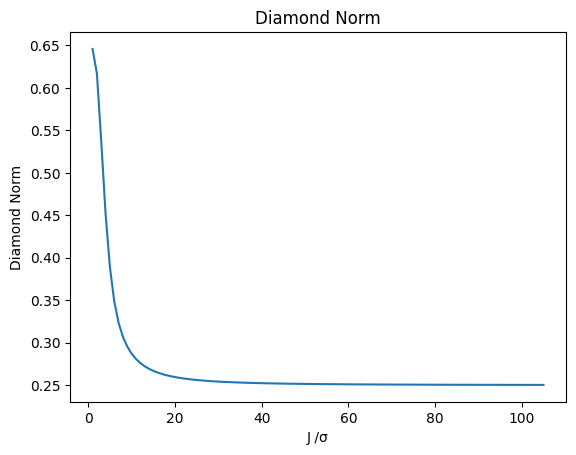

In [665]:
# plotting the points 
plt.plot(lambda_phi, Diamond_norm_List)
  
# naming the x axis
plt.xlabel('J /\u03C3')
# naming the y axis
plt.ylabel('Diamond Norm')
  
# giving a title to my graph
plt.title('Diamond Norm')
  
# function to show the plot
plt.savefig('UDW_Channel_Capacity_Diamond_Norm.pdf')
